Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


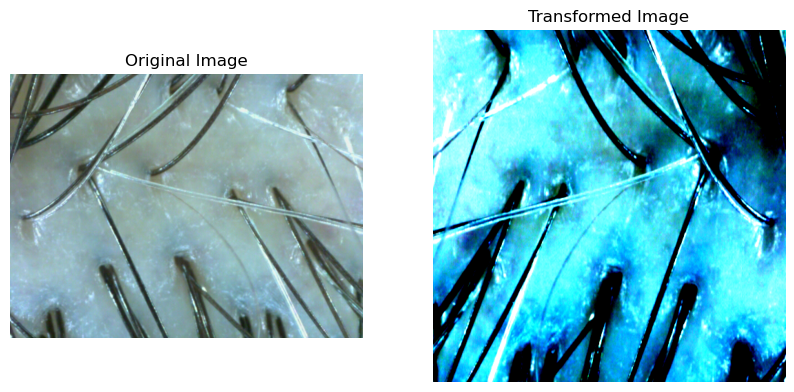

In [4]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img_size = 512

# 예시 이미지 경로
image_path = "/data/hbsuh/HairLoss/Training/0/0177_A2LEBJJDE00152B_1604650530904_6_BH.jpg"

# 이미지 로드
image = np.array(Image.open(image_path))

# 데이터 변환 설정
transform = A.Compose([
    A.Resize(img_size, img_size),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(
        brightness_limit=(-0.1, 0.1),
        contrast_limit=(-0.1, 0.1),
        p=0.5
    ),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
        max_pixel_value=255.0,
        p=1.0
    ),
    ToTensorV2()
])

# 원본 이미지 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# 변환 적용
transformed_image = transform(image=image)["image"]

# 변환된 이미지 시각화
plt.subplot(1, 2, 2)
plt.imshow(transformed_image.permute(1, 2, 0))  # 이미지의 채널 순서를 변경
plt.title("Transformed Image")
plt.axis('off')

plt.show()

Annotation

In [5]:
import pandas as pd
import os

trainpath = "/data/hbsuh/HairLoss/Training"
testpath = "/data/hbsuh/HairLoss/Validation"

train_df = pd.DataFrame(columns=["ID", "LABEL", "PATH"])  # "CLASS"를 "LABEL"로 변경했습니다. 컬럼 일치시키기

for classnums in os.listdir(trainpath):
    classnum = os.path.join(trainpath, classnums)
    if os.path.isdir(classnum):  # 디렉토리인지 확인
        for images in os.listdir(classnum):
            if images.lower().endswith(".jpg"):
                imagepath = os.path.join(classnum, images)
                # train_df = train_df.append({"ID": images, "LABEL": classnums, "PATH": imagepath}, ignore_index=True)
                train_df.loc[len(train_df)] = {"ID": images, "LABEL": classnums, "PATH": imagepath}

train_df.to_csv("/home/goldlab/Project/Experiment3/Train_annotations.csv")

test_df = pd.DataFrame(columns=["ID", "LABEL", "PATH"])  # "CLASS"를 "LABEL"로 변경했습니다. 테스트 데이터프레임에도 'LABEL' 컬럼 추가

for classnums in os.listdir(testpath):
    classnum = os.path.join(testpath, classnums)
    if os.path.isdir(classnum):  # 디렉토리인지 확인
        for images in os.listdir(classnum):
            if images.lower().endswith(".jpg"):
                imagepath = os.path.join(classnum, images)
                # test_df = test_df.append({"ID": images, "LABEL": classnums, "PATH": imagepath}, ignore_index=True)
                test_df.loc[len(test_df)] = {"ID": images, "LABEL": classnums, "PATH": imagepath}
            
            
test_df.to_csv("/home/goldlab/Project/Experiment3/Test_annotations.csv")
